### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Фаик Карим
##### Группа:   НФИбд-02-21

## Москва 2024
***

### Вариант 17

1. Набор данных: imagenette/160px-v2 с изменением разрешения до 48х48

2. Диапазон классов: 0, 2, 4, 6

3. Архитектура автокодировщика: MLP

4. Показатель качества: максимальная ошибка (MaxErr) для ошибки реконструкции

5. Показатель качества бинарной классификации:
  индекс Жаккара, равный TP/(TP + FP + FN)

# 1.Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).

In [1]:
!pip install -q tfds-nightly
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.9 MB/s eta 0:00:00


In [3]:
ds = tfds.load("imagenette/160px-v2", split=['train', 'validation'])

In [4]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape


((9469, 2), (3925, 2))

In [5]:
df_train['label'].unique(), df_test['label'].unique()

(array([2, 6, 7, 3, 4, 5, 8, 0, 1, 9]), array([9, 3, 2, 1, 7, 6, 0, 5, 8, 4]))

In [6]:
df_train.head()

,image,label
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",2
1,"[[[99, 97, 98], [171, 169, 170], [220, 218, 21...",6
2,"[[[2, 6, 18], [5, 9, 20], [5, 12, 22], [6, 13,...",7
3,"[[[172, 167, 101], [180, 174, 112], [193, 188,...",3
4,"[[[0, 2, 5], [26, 31, 34], [23, 28, 31], [6, 1...",4


In [7]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((9469,), (3925,))

In [8]:
train_images = np.zeros(shape=(df_train.shape[0],48,48,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],48,48,3), dtype=np.float32)
train_images.shape, test_images.shape

((9469, 48, 48, 3), (3925, 48, 48, 3))

In [9]:
from PIL import Image, ImageOps

In [10]:
for idx in range(train_labels.shape[0]):

    train_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_train.iloc[idx]['image']), [48, 48]))


for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_test.iloc[idx]['image']), [48, 48]))

train_images.shape, test_images.shape

((9469, 48, 48, 3), (3925, 48, 48, 3))

In [11]:
train_images = tf.image.rgb_to_grayscale(train_images)
test_images = tf.image.rgb_to_grayscale(test_images)

In [12]:
train_images = train_images[0:]
test_images = test_images[0:]

In [13]:
train_images /= 255
test_images  /= 255

train_images.shape, test_images.shape

(TensorShape([9469, 48, 48, 1]), TensorShape([3925, 48, 48, 1]))

In [14]:
import random

def plot_random_sample(images):
    n = 20
    imgs = random.sample(list(images), n)

    num_row = 4
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

In [15]:
trimages = []
trlabels = []

for i in range(train_labels.shape[0]):
  if(df_train.iloc[i]['label'] in (0,2,4,6)):
    trimages.append(train_images[i])
    trlabels.append(train_labels[i])

trimages = np.asarray(trimages)
trlabels = np.asarray(trlabels)

trimages.shape, trlabels.shape

((3858, 48, 48, 1), (3858,))

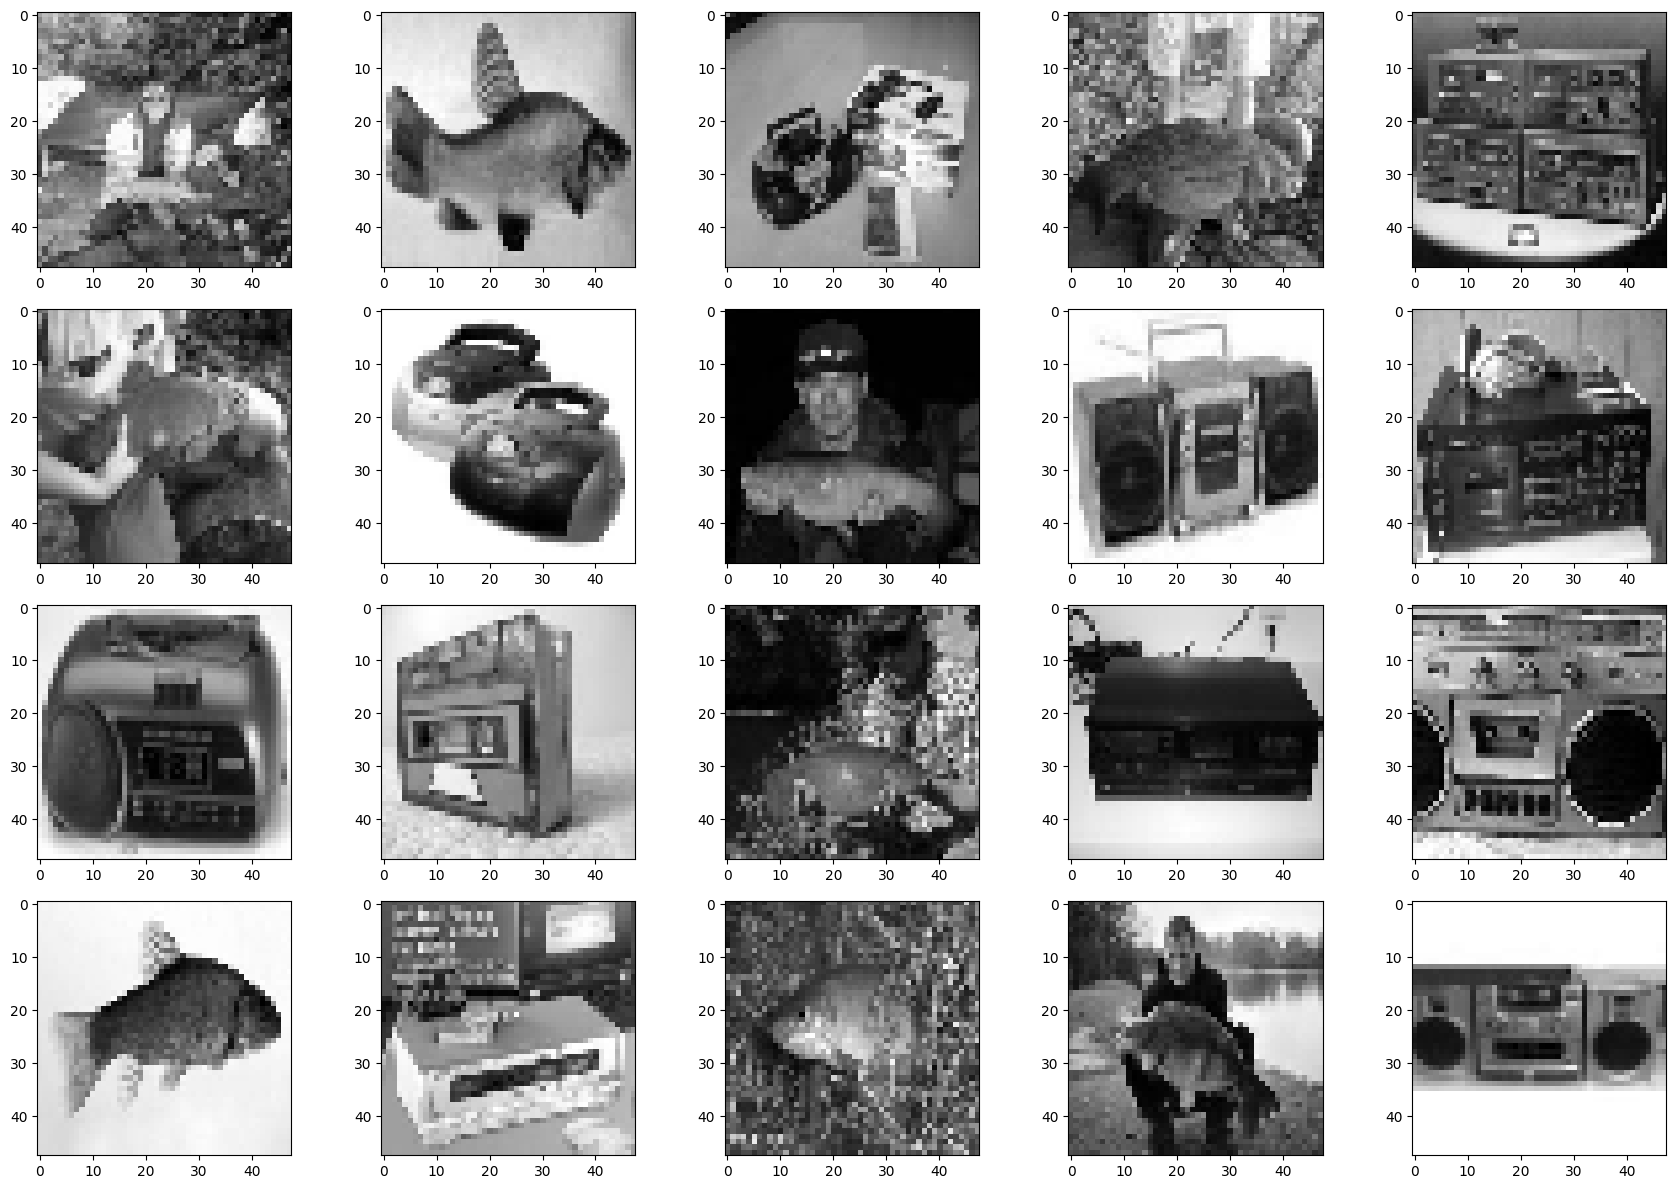

In [52]:
plot_random_sample(trimages)

In [17]:
def display_image(img):
  plt.imshow(img);

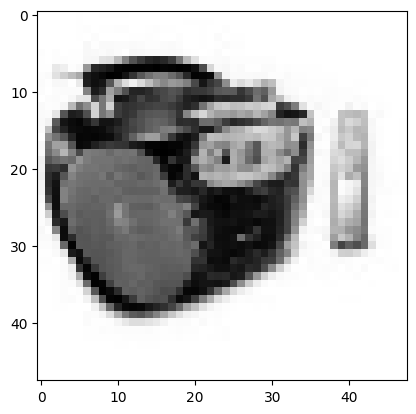

In [50]:
display_image(train_images[0])

In [19]:
tstimages = []
tstlabels = []

for i in range(test_labels.shape[0]):
  if(df_test.iloc[i]['label'] in (0,2,4,6)):
    tstimages.append(test_images[i])
    tstlabels.append(test_labels[i])

tstimages = np.asarray(tstimages)
tstlabels = np.asarray(tstlabels)

tstimages.shape, tstlabels.shape

((1542, 48, 48, 1), (1542,))

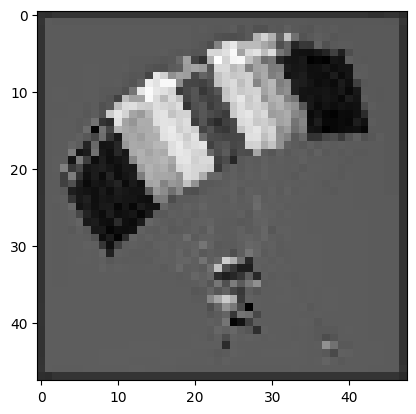

In [51]:
display_image(test_images[0])

# 2. Постройте для набора данных график логарифмического правдоподобия профиля в зависимости от числа главных компонент и определите размерность латентного пространства.

In [21]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
import warnings
warnings.simplefilter("ignore", RuntimeWarning)  # for some NaN values

# Function to calculate log likelihood of PCA from eigenvalues

def log_likelihood(evals):

    Lmax = len(evals)
    ll = np.arange(0.0, Lmax)

    for L in range(Lmax):

        group1 = evals[0 : L + 1]  # Divide Eigenvalues in two groups
        group2 = evals[L + 1 : Lmax]

        mu1 = np.mean(group1)
        mu2 = np.mean(group2)

        sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2)) / Lmax

        ll_group1 = np.sum(multivariate_normal.logpdf(group1, mu1, sigma))
        ll_group2 = np.sum(multivariate_normal.logpdf(group2, mu2, sigma))

        ll[L] = ll_group1 + ll_group2

    return ll

In [22]:
x_train = np.array([image.flatten() for image in trimages])

In [23]:
X_rank = np.linalg.matrix_rank(x_train)
K_linspace = np.linspace(1, 0.75 * X_rank, 10, dtype=int)
Ks = np.unique(np.append([1, 5, 10, 20], K_linspace))

RMSE_train = np.arange(len(Ks))

for index, K in enumerate(Ks):
    pca = PCA(n_components=K)

    Xtrain_transformed = pca.fit_transform(x_train)
    Xtrain_proj = pca.inverse_transform(Xtrain_transformed)
    RMSE_train[index] = mean_squared_error(x_train, Xtrain_proj, squared=False)

In [24]:
n_samples, n_features = x_train.shape
Kmax = min(n_samples, n_features)

pca = PCA(n_components=Kmax)
X_transformed = pca.fit_transform(x_train)
evals = pca.explained_variance_

ll = log_likelihood(evals)

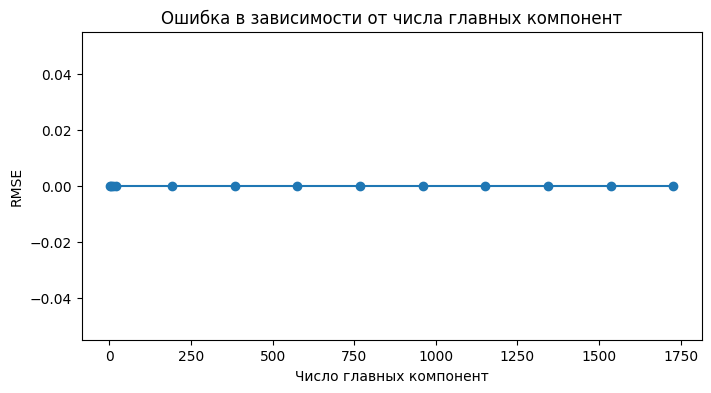

In [25]:
fig, ax = plt.subplots(figsize=(8, 4))
xs = Ks
ys = RMSE_train
plt.title("Ошибка в зависимости от числа главных компонент")
plt.xlabel("Число главных компонент")
plt.ylabel("RMSE")
ax.plot(xs, ys, marker="o")
plt.show()

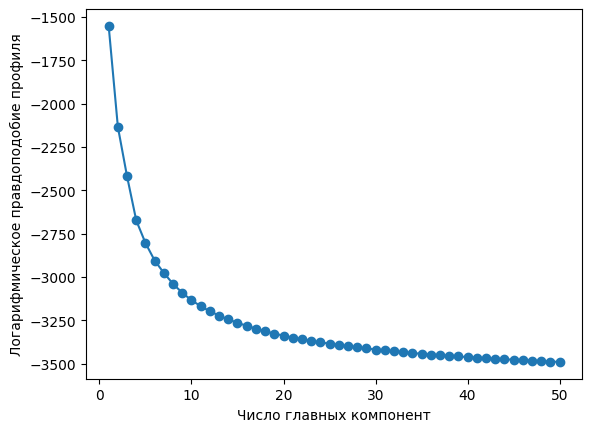

In [26]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[0:50]
plt.xlabel("Число главных компонент")
plt.ylabel("Логарифмическое правдоподобие профиля")

ax.plot(xs, ys, marker="o")
plt.show()

In [27]:
def find_elbow(ll):
    second_derivative = np.diff(np.diff(ll))
    elbow_point = np.argmax(second_derivative) + 1
    return elbow_point

elbow = find_elbow(ll)

print(f"Определённая размерность латентного пространства: {elbow}")

Определённая размерность латентного пространства: 1


# 3.Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании, с размерностью скрытого представления, равной размерности латентного пространства, определенной в п.2. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Визуализируйте несколько исходных и восстановленных автокодировщиком изображений.

In [63]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (48, 48, 1)

input_img = tf.keras.Input(shape=input_shape)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
encoded = layers.Dense(128, activation='relu')(x)


x = layers.Dense(256, activation='relu')(encoded)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(48 * 48, activation='sigmoid')(x)
decoded = layers.Reshape((48, 48))(x)

autoencoderMLP = tf.keras.Model(input_img, decoded)

encoder = tf.keras.models.Model(input_img, encoded)

autoencoderMLP.compile(optimizer='adam', loss='binary_crossentropy')

autoencoderMLP.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0   

In [64]:
autoencoderMLP.compile(optimizer='adam', loss='binary_crossentropy')

In [65]:
x_trainMLP = trimages.reshape(
    (len(trimages), 48, 48, 1))
x_testMLP  = tstimages.reshape(
    (len(tstimages), 48, 48, 1))
x_trainMLP.shape, x_testMLP.shape

((1956, 48, 48, 1), (744, 48, 48, 1))

In [66]:
autoencoderMLP.fit(x_trainMLP, x_trainMLP,
                epochs=10,
                batch_size=512,
                shuffle=True,
                validation_data=(x_testMLP, x_testMLP),
                verbose = 1);

Epoch 1/10
4/4 [==============================] - 17s 3s/step - loss: 0.6927 - val_loss: 0.6898
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 0.6860 - val_loss: 0.6762
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 0.6755 - val_loss: 0.6682
Epoch 4/10
4/4 [==============================] - 11s 2s/step - loss: 0.6681 - val_loss: 0.6643
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 0.6610 - val_loss: 0.6493
Epoch 6/10
4/4 [==============================] - 9s 2s/step - loss: 0.6469 - val_loss: 0.6347
Epoch 7/10
4/4 [==============================] - 10s 2s/step - loss: 0.6350 - val_loss: 0.6328
Epoch 8/10
4/4 [==============================] - 11s 3s/step - loss: 0.6337 - val_loss: 0.6256
Epoch 9/10
4/4 [==============================] - 12s 3s/step - loss: 0.6251 - val_loss: 0.6207
Epoch 10/10
4/4 [==============================] - 8s 2s/step - loss: 0.6200 - val_loss: 0.6142


In [67]:
decoded_imgs = autoencoderMLP.predict(x_testMLP)

24/24 [==============================] - 1s 41ms/step


Первоначальные изображения

In [68]:
decoded_imgs.shape

(744, 48, 48)

In [69]:
tstimages.shape

(744, 48, 48, 1)

In [70]:
def show_images(orig_imgs, dec_imgs, fname=None):
    n = 10  # кол-во изображений
    fig = plt.figure(figsize=(20, 4))
    for i in range(n):
        # исходные изображения
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(orig_imgs[i].reshape(48, 48))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # реконструированные изображения
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(dec_imgs[i].reshape(48, 48))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

    if fname:
        fig.savefig(fname)

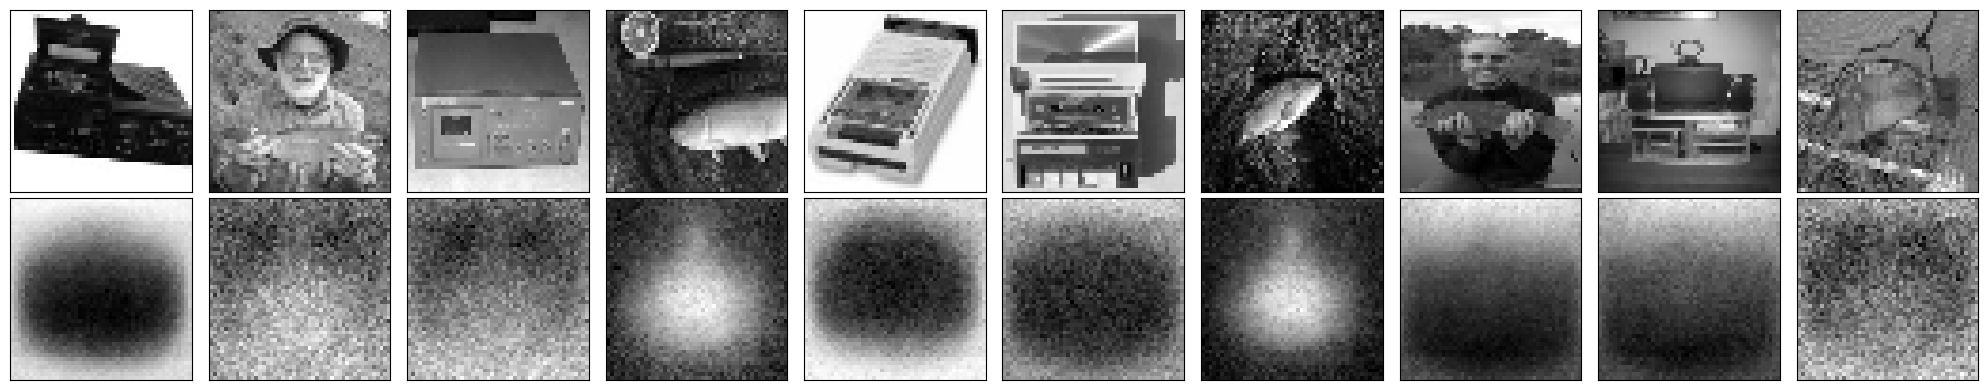

In [71]:
show_images(tstimages, decoded_imgs)

# 4. Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.

In [72]:
reconstructed_images = autoencoderMLP.predict(tstimages)

max_error = 0

for i in range(len(tstimages)):
    original_image = tstimages[i]
    reconstructed_image = reconstructed_images[i]
    absolute_error = np.abs(original_image - reconstructed_image)
    image_max_error = np.max(absolute_error)

    if image_max_error > max_error:
        max_error = image_max_error

print(f'Максимальная ошибка (MaxErr) : {max_error:.2f}')


24/24 [==============================] - 2s 65ms/step
Максимальная ошибка (MaxErr) : 0.96


# 5.Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

In [73]:
trimages = []
trlabels = []

for i in range(train_labels.shape[0]):
  if(df_train.iloc[i]['label'] in (0,2)):
    trimages.append(train_images[i])
    trlabels.append(train_labels[i])

trimages = np.asarray(trimages)
trlabels = np.asarray(trlabels)

trimages.shape, trlabels.shape

((1956, 48, 48, 1), (1956,))

In [74]:
tstimages = []
tstlabels = []

for i in range(test_labels.shape[0]):
  if(df_test.iloc[i]['label'] in (0,2)):
    tstimages.append(test_images[i])
    tstlabels.append(test_labels[i])

tstimages = np.asarray(tstimages)
tstlabels = np.asarray(tstlabels)

tstimages.shape, tstlabels.shape

((744, 48, 48, 1), (744,))

In [75]:
x_testMLP  = tstimages.reshape(
    (len(tstimages), 48, 48, 1))

In [76]:
encoded_imgs = encoder.predict(x_testMLP)

24/24 [==============================] - 1s 37ms/step


In [77]:
np.unique(tstlabels)

array([0., 2.], dtype=float32)

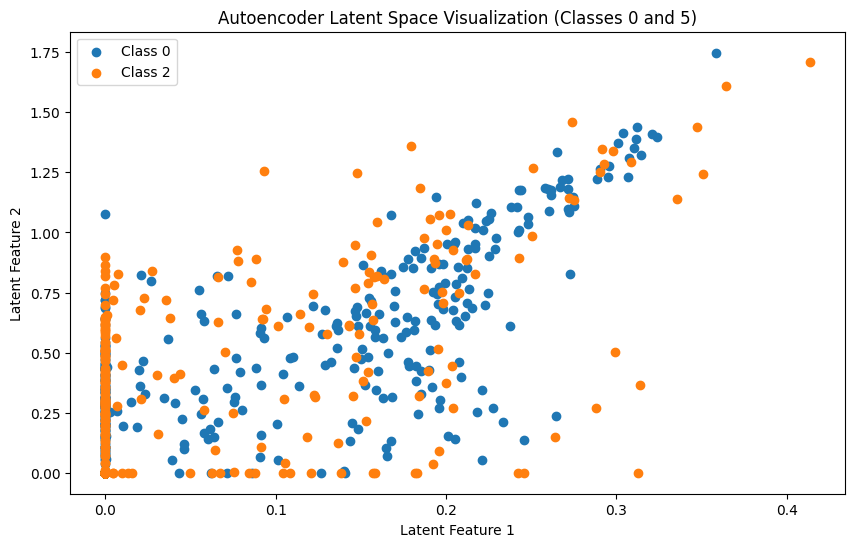

In [105]:
plt.figure(figsize=(10, 6))
for class_value in [0, 2]:
    plt.scatter(encoded_imgs[tstlabels == class_value, 0],
               encoded_imgs[tstlabels == class_value, 5],
                label=f'Class {class_value}')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('Autoencoder Latent Space Visualization (Classes 0 and 5)')
plt.legend()


plt.show()


# 6.Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените долю верных ответов (accuracy) для двух построенных классификаторов

In [106]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_curve, auc,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

In [107]:
latent_repr_train = encoder.predict(trimages)
latent_repr_test = encoder.predict(tstimages)

latent_repr_train_flattened = latent_repr_train.reshape(latent_repr_train.shape[0], -1)
latent_repr_test_flattened = latent_repr_test.reshape(latent_repr_test.shape[0], -1)

knn_latent = KNeighborsClassifier(n_neighbors=3)
knn_latent.fit(latent_repr_train_flattened, trlabels)


knn_latent = KNeighborsClassifier(n_neighbors=3)
knn_latent.fit(latent_repr_train_flattened, trlabels)


y_pred_latent = knn_latent.predict(latent_repr_test_flattened)


jaccard_latent = jaccard_score(tstlabels, y_pred_latent, average='macro')

print(f'Индекс Жаккара на латентных признаках: {jaccard_latent:.2f}')


X_train_flattened = trimages.reshape(trimages.shape[0], -1)
X_test_flattened = tstimages.reshape(tstimages.shape[0], -1)


knn_all_features = KNeighborsClassifier(n_neighbors=3)
knn_all_features.fit(X_train_flattened, trlabels)


y_pred_all_features = knn_all_features.predict(X_test_flattened)


jaccard_all = jaccard_score(tstlabels, y_pred_all_features, average='macro')

print(f'Индекс Жаккара на всех признаках: {jaccard_all:.2f}')

24/24 [==============================] - 1s 36ms/step
Индекс Жаккара на латентных признаках: 0.57
Индекс Жаккара на всех признаках: 0.62


# 7. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).

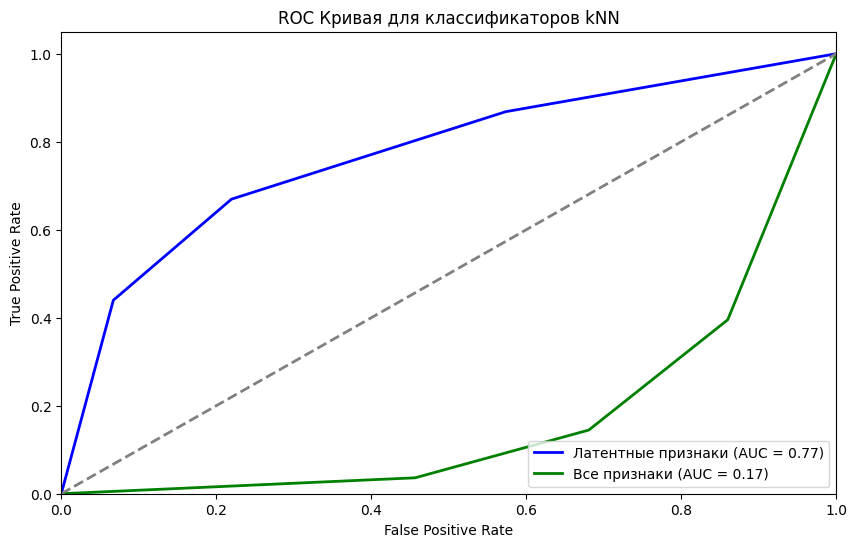

In [108]:
y_score_latent = knn_latent.predict_proba(latent_repr_test_flattened)[:, 1]
y_score_all_features = knn_all_features.predict_proba(X_test_flattened)[:, 1]

fpr_latent, tpr_latent, _ = roc_curve(tstlabels, y_score_latent,pos_label=2)
fpr_all_features, tpr_all_features, _ = roc_curve(tstlabels, y_score_all_features,pos_label=0)

roc_auc_latent = auc(fpr_latent, tpr_latent)
roc_auc_all_features = auc(fpr_all_features, tpr_all_features)

# Визуализация ROC-кривых
plt.figure(figsize=(10, 6))
plt.plot(fpr_latent, tpr_latent, color='blue', lw=2, label=f'Латентные признаки (AUC = {roc_auc_latent:.2f})')
plt.plot(fpr_all_features, tpr_all_features, color='green', lw=2, label=f'Все признаки (AUC = {roc_auc_all_features:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Кривая для классификаторов kNN')
plt.legend(loc='lower right')
plt.show()

# 8.Визуализируйте границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков задайте средние/медианные значения).

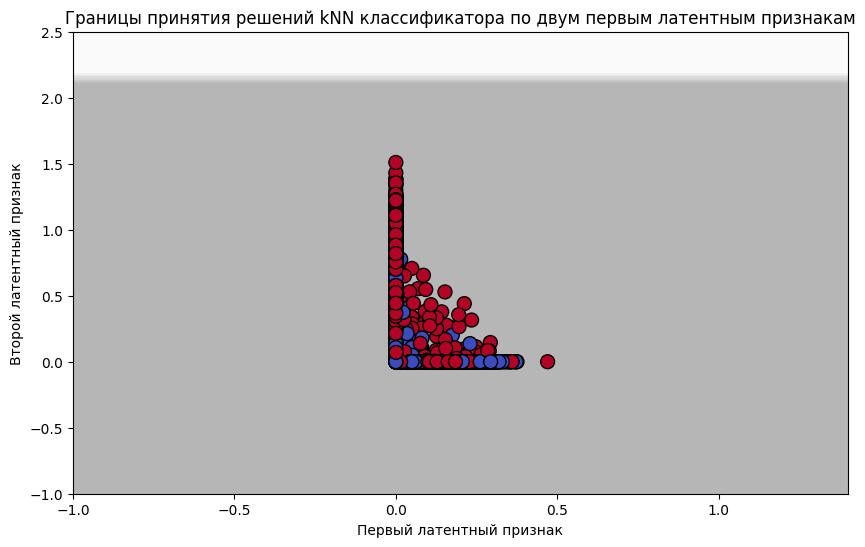

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score


latent_repr_train_flattened = latent_repr_train.reshape(latent_repr_train.shape[0], -1)
latent_repr_test_flattened = latent_repr_test.reshape(latent_repr_test.shape[0], -1)


knn_latent = KNeighborsClassifier(n_neighbors=3)
knn_latent.fit(latent_repr_train_flattened, trlabels)


X_vis = latent_repr_train_flattened[:, :2]
y_vis = trlabels


x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

mean_values = np.mean(latent_repr_train_flattened[:, 2:], axis=0)

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points = np.hstack([grid_points, np.tile(mean_values, (grid_points.shape[0], 1))])

Z = knn_latent.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', marker='o', s=100, cmap=plt.cm.coolwarm)
plt.xlabel('Первый латентный признак')
plt.ylabel('Второй латентный признак')
plt.title('Границы принятия решений kNN классификатора по двум первым латентным признакам')
plt.show()


# 9. Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения.

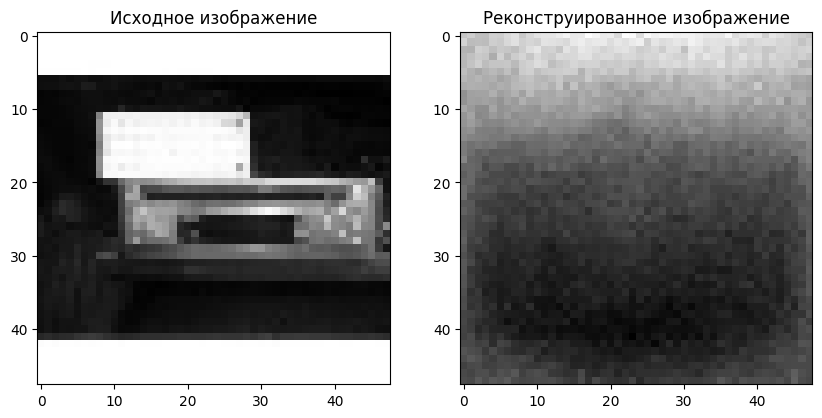

In [110]:
from sklearn.metrics import mean_squared_error

reconstruction_errors = [mean_squared_error(tstimages.flatten(), decoded_image.flatten())
                         for tstimages, decoded_image in zip(x_testMLP, decoded_imgs)]

max_error_index = np.argmax(reconstruction_errors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_testMLP[max_error_index].reshape(48, 48), cmap='gray')
plt.title('Исходное изображение')
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[max_error_index].reshape(48, 48))
plt.title('Реконструированное изображение')
plt.show()